In [1]:
#Basic libraries
import pandas as pd
import numpy as np 
import numpy as np

#Vizualization Tools
import matplotlib.pyplot as plt
import seaborn as sns

#Modeling Tools
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import statsmodels.api as sm

from datetime import date

import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


import warnings
warnings.filterwarnings("ignore")

#Custim functions
from env import host, user, password #Database credentials
import wrangle
import wrangle2

In [2]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import MinMaxScaler, RobustScaler
# from sklearn.model_selection import train_test_split
# import warnings
# warnings.filterwarnings('ignore')
# import wrangle2

In [3]:
train, X_train, y_train, X_validate, y_validate, X_test, y_test= wrangle2.wrangle()

In [4]:
X_train.shape

(30211, 35)

In [5]:
X_train.describe()

,id,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,baseline
count,3.021100e+04,3.021100e+04,30211.000000,30211.000000,30211.000000,30211.000000,30211.000000,30211.000000,30211.0,30211.000000,...,30211.0,30211.0,30211.000000,3.021100e+04,3.021100e+04,30211.0,3.021100e+04,30211.000000,3.021100e+04,3.021100e+04
mean,1.500216e+06,1.184948e+07,2.191586,2.959419,6.563404,2.191586,1668.687399,1668.687399,6037.0,2.191586,...,0.0,1.0,1962.564629,1.737885e+05,4.490501e+05,2016.0,2.752616e+05,5641.211813,6.037445e+13,1.478145e-02
std,8.574379e+05,7.249722e+05,0.949173,0.977168,1.677620,0.949173,857.223783,857.223783,0.0,0.949173,...,0.0,0.0,22.661940,1.980012e+05,5.778096e+05,0.0,4.234312e+05,6785.402854,2.510385e+09,1.034953e-14
min,1.307000e+03,1.071188e+07,1.000000,1.000000,1.000000,1.000000,360.000000,360.000000,6037.0,1.000000,...,0.0,1.0,1882.000000,1.810000e+02,3.254000e+03,2016.0,1.610000e+02,120.840000,6.037101e+13,1.478145e-02
25%,7.649615e+05,1.118355e+07,2.000000,2.000000,6.000000,2.000000,1135.000000,1135.000000,6037.0,2.000000,...,0.0,1.0,1949.000000,8.131300e+04,1.753965e+05,2016.0,5.962100e+04,2469.620000,6.037219e+13,1.478145e-02
50%,1.509854e+06,1.184090e+07,2.000000,3.000000,6.000000,2.000000,1454.000000,1454.000000,6037.0,2.000000,...,0.0,1.0,1959.000000,1.288550e+05,3.144210e+05,2016.0,1.698440e+05,4097.590000,6.037430e+13,1.478145e-02
75%,2.242931e+06,1.251033e+07,3.000000,4.000000,8.000000,3.000000,1942.000000,1942.000000,6037.0,3.000000,...,0.0,1.0,1980.000000,1.992435e+05,5.167300e+05,2016.0,3.362880e+05,6416.140000,6.037577e+13,1.478145e-02
max,2.982167e+06,1.310220e+07,11.000000,9.000000,12.000000,11.000000,12616.000000,12616.000000,6037.0,11.000000,...,0.0,1.0,2016.000000,7.507773e+06,2.385837e+07,2016.0,1.635060e+07,276797.830000,6.037980e+13,1.478145e-02


In [6]:
train.columns

Index(['id', 'parcelid', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedbathnbr', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'fips', 'fullbathcnt', 'heatingorsystemtypeid',
       'latitude', 'longitude', 'lotsizesquarefeet',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidzip', 'roomcnt', 'unitcnt', 'yearbuilt',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear',
       'landtaxvaluedollarcnt', 'taxamount', 'censustractandblock', 'logerror',
       'transactiondate', 'heatingorsystemdesc', 'propertylandusedesc',
       'county', 'baseline'],
      dtype='object')

In [7]:
train.calculatedfinishedsquarefeet.sort_values().tail()

54368    0.920202
20048    0.921100
4909     0.925506
4173     0.952921
21690    1.000000
Name: calculatedfinishedsquarefeet, dtype: float64

In [8]:
train.head().T

,35642,40465,24871,72729,27020
id,0.912976,0.452927,0.066856,0.960764,0.776872
parcelid,0.868722,0.886103,0.652438,0.109629,0.532853
bathroomcnt,0.1,0.1,0.0,0.1,0.1
bedroomcnt,0.375,0.25,0.125,0.25,0.25
buildingqualitytypeid,0.636364,0.454545,0.363636,0.454545,0.636364
calculatedbathnbr,0.1,0.1,0.0,0.1,0.1
calculatedfinishedsquarefeet,0.104112,0.09938,0.019093,0.108029,0.137157
finishedsquarefeet12,0.104112,0.09938,0.019093,0.108029,0.137157
fips,0.0,0.0,0.0,0.0,0.0
fullbathcnt,0.1,0.1,0.0,0.1,0.1


In [9]:
train.fips.value_counts()

0.0    30211
Name: fips, dtype: int64

In [10]:
#null values cleared

train.isna().sum()

id                              0
parcelid                        0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedbathnbr               0
calculatedfinishedsquarefeet    0
finishedsquarefeet12            0
fips                            0
fullbathcnt                     0
heatingorsystemtypeid           0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
propertylandusetypeid           0
propertyzoningdesc              0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
unitcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
censustractand

In [11]:
train.baseline.value_counts()

0.0    30211
Name: baseline, dtype: int64

In [12]:
# added age column into train - likely add to wrangle later
train['age'] = 2017 - train.yearbuilt

In [13]:
train.yearbuilt.value_counts()

0.507463    1041
0.544776     965
0.529851     942
0.537313     846
0.522388     762
            ... 
0.074627       1
0.052239       1
1.000000       1
0.089552       1
0.111940       1
Name: yearbuilt, Length: 130, dtype: int64

In [14]:
train.age.value_counts()

2016.492537    1041
2016.455224     965
2016.470149     942
2016.462687     846
2016.477612     762
               ... 
2016.925373       1
2016.947761       1
2016.000000       1
2016.910448       1
2016.888060       1
Name: age, Length: 130, dtype: int64

In [15]:
train.yearbuilt

35642    0.514925
40465    0.544776
24871    0.500000
72729    0.917910
27020    0.380597
           ...   
16518    0.865672
52347    0.664179
24476    0.492537
36558    0.328358
34565    0.798507
Name: yearbuilt, Length: 30211, dtype: float64

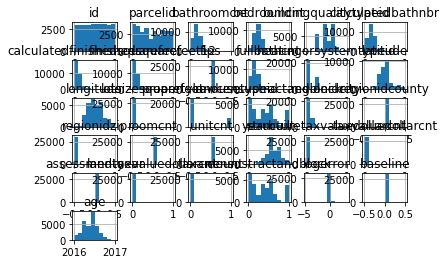

In [16]:
train.hist();
#X.hist();

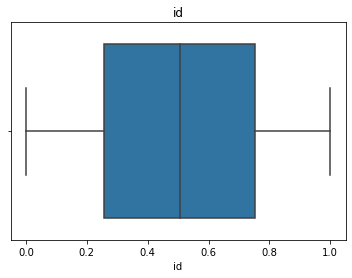

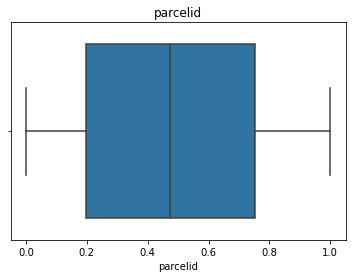

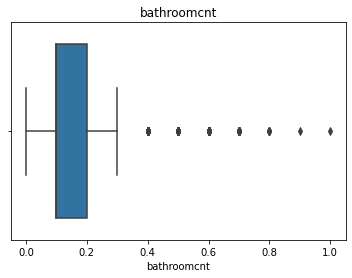

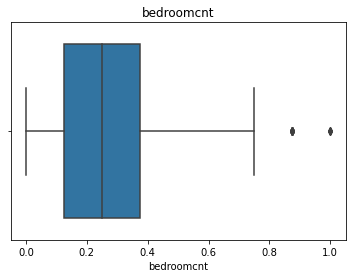

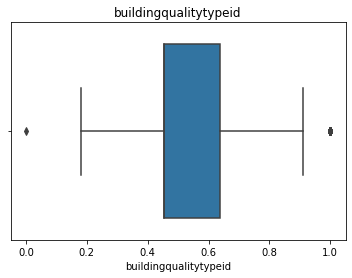

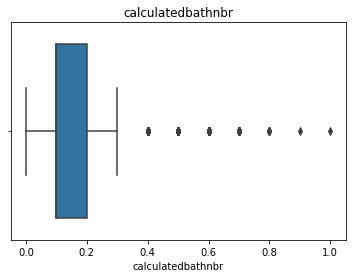

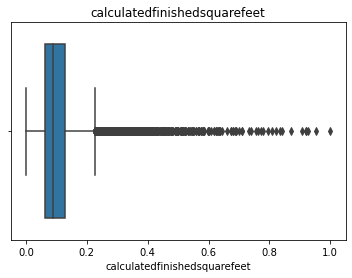

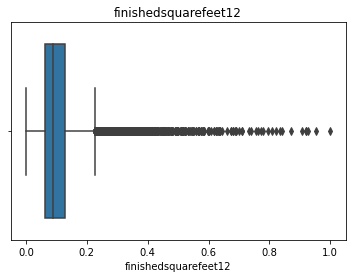

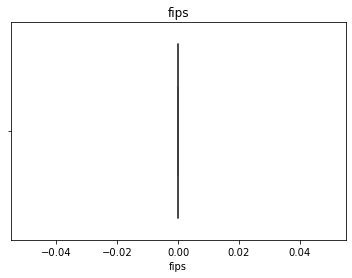

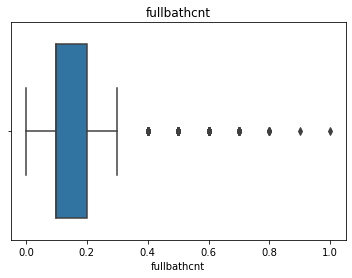

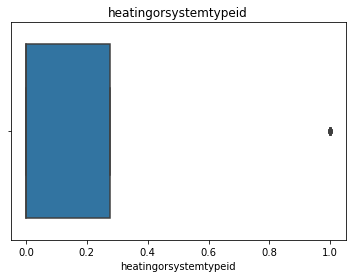

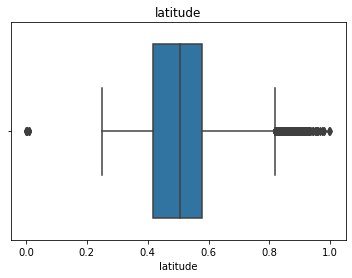

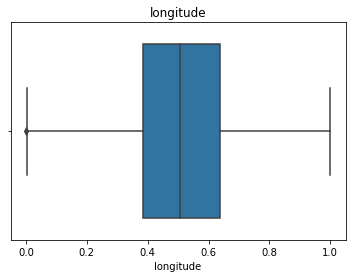

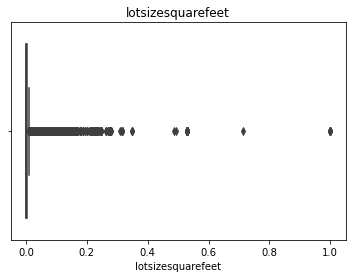

TypeError: Horizontal orientation requires numeric `x` variable.

In [17]:
for col in train.columns:
    sns.boxplot(train[col])
    plt.title(col)
    plt.show()

In [ ]:
#viz clusters 

In [18]:
partitions = [train, X_train, X_validate, X_test, y_train, y_validate, y_test]


In [19]:
train.columns

Index(['id', 'parcelid', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedbathnbr', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'fips', 'fullbathcnt', 'heatingorsystemtypeid',
       'latitude', 'longitude', 'lotsizesquarefeet',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidzip', 'roomcnt', 'unitcnt', 'yearbuilt',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear',
       'landtaxvaluedollarcnt', 'taxamount', 'censustractandblock', 'logerror',
       'transactiondate', 'heatingorsystemdesc', 'propertylandusedesc',
       'county', 'baseline', 'age'],
      dtype='object')

In [20]:
train['taxrate'] = train.taxamount/train.taxvaluedollarcnt*100


In [23]:
from sklearn.cluster import KMeans

In [24]:
train['age'] = train['age'] - 2016

In [25]:
cluster_vars = ['latitude', 'longitude', 'age']
cluster_name = 'calculatedfinishedsquarefeet'
k_range = range(2,20)

In [26]:
def find_k(X_train, cluster_vars, k_range):
    sse = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k)

        # X[0] is our X_train dataframe..the first dataframe in the list of dataframes stored in X. 
        kmeans.fit(X_train[cluster_vars])

        # inertia: Sum of squared distances of samples to their closest cluster center.
        sse.append(kmeans.inertia_) 

    # compute the difference from one k to the next
    delta = [round(sse[i] - sse[i+1],0) for i in range(len(sse)-1)]

    # compute the percent difference from one k to the next
    pct_delta = [round(((sse[i] - sse[i+1])/sse[i])*100, 1) for i in range(len(sse)-1)]

    # create a dataframe with all of our metrics to compare them across values of k: SSE, delta, pct_delta
    k_comparisons_df = pd.DataFrame(dict(k=k_range[0:-1], 
                             sse=sse[0:-1], 
                             delta=delta, 
                             pct_delta=pct_delta))

    # plot k with inertia
    plt.plot(k_comparisons_df.k, k_comparisons_df.sse, 'bx-')
    plt.xlabel('k')
    plt.ylabel('SSE')
    plt.title('The Elbow Method to find the optimal k\nFor which k values do we see large decreases in SSE?')
    plt.show()

    # plot k with pct_delta
    plt.plot(k_comparisons_df.k, k_comparisons_df.pct_delta, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Percent Change')
    plt.title('For which k values are we seeing increased changes (%) in SSE?')
    plt.show()

    # plot k with delta
    plt.plot(k_comparisons_df.k, k_comparisons_df.delta, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Absolute Change in SSE')
    plt.title('For which k values are we seeing increased changes (absolute) in SSE?')
    plt.show()

    return k_comparisons_df

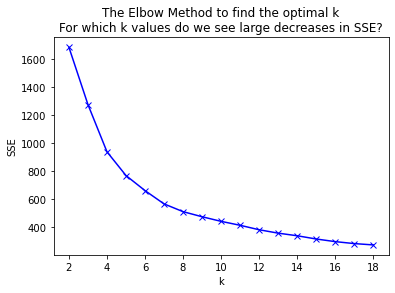

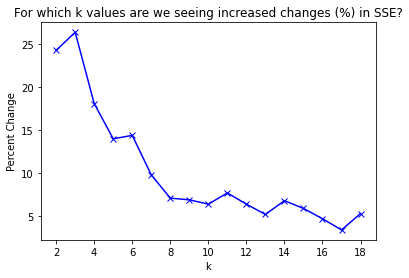

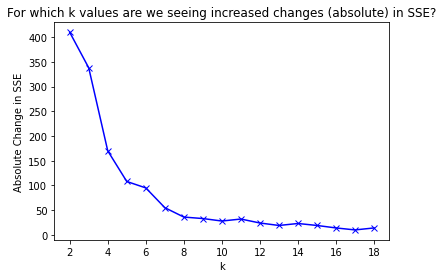

,k,sse,delta,pct_delta
0,2,1686.761346,410.0,24.3
1,3,1277.218485,338.0,26.4
2,4,939.403005,170.0,18.1
3,5,769.696882,108.0,14.0
4,6,662.008391,95.0,14.4
5,7,566.934694,55.0,9.8
6,8,511.437944,36.0,7.1
7,9,475.046237,33.0,6.9
8,10,442.191430,28.0,6.4
9,11,413.969017,32.0,7.7


In [27]:
find_k(train, cluster_vars, k_range)


In [28]:
k=7
# cluster vars
# cluster name

In [30]:
k=7
def create_clusters(X_train, k, cluster_vars):
    # create kmean object
    kmeans = KMeans(n_clusters=k, random_state = 13)

    # fit to train and assign cluster ids to observations
    kmeans.fit(X_train[cluster_vars])

    return kmeans

In [31]:
kmeans = create_clusters(train, k, cluster_vars)


In [32]:
def get_centroids(kmeans, cluster_vars, cluster_name):
    # get the centroids for each distinct cluster...

    centroid_col_names = ['centroid_' + i for i in cluster_vars]

    centroid_df = pd.DataFrame(kmeans.cluster_centers_, 
                               columns=centroid_col_names).reset_index().rename(columns={'index': cluster_name})

    return centroid_df

In [33]:
centroid_df = get_centroids(kmeans, cluster_vars, cluster_name)


In [34]:
centroid_df.head(7)
#clearly my age cluster is F'ing me up - this is preliminary practice

,calculatedfinishedsquarefeet,centroid_latitude,centroid_longitude,centroid_age
0,0,0.380444,0.575297,0.468415
1,1,0.434978,0.486015,0.214581
2,2,0.476357,0.523498,0.679747
3,3,0.487261,0.807453,0.371702
4,4,0.553342,0.360894,0.467408
5,5,0.631156,0.296600,0.247502
6,6,0.871461,0.628701,0.226283


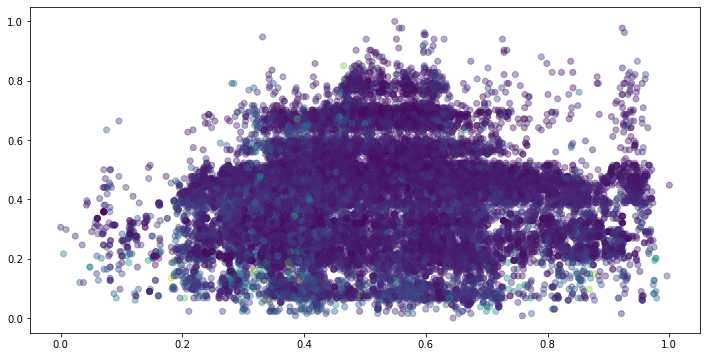

In [37]:
plt.figure(figsize=(12,6))
# plt.scatter(y=X_train.latitude, x=X_train.longitude, c=X_train.area_cluster, alpha=.4)
plt.scatter(y=train.age, x=train.longitude, c=train.calculatedfinishedsquarefeet, alpha=.4)